In [1]:
# Importing usefull libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

In [2]:
# Importing some scripts

from scripts.data_vizualization import Data_Viz 
from scripts.data_cleaning import DataCleaner
from scripts.data_transformation import DataTransformer

DC = DataCleaner()
DV = Data_Viz()
DT = DataTransformer()

In [3]:
# Reading the datasets

train_data = pd.read_csv('../data/train_store.csv')
test_data = pd.read_csv('../data/test_store.csv')

### 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [4]:
# Finding out the total promotion percentage in both the training and test dataset

promo_test_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
promo_train_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])

In [5]:
# Printing the number of percentages

print(f'There are {promo_test_percentage:.2%} of promotion in the test data set ')
print(f'There are {promo_train_percentage:.2%} of promotion in the train data set ')

There are 39.58% of promotion in the test data set 
There are 38.15% of promotion in the train data set 


In [6]:
# Creating a test and train promo data frame for visualization

promo_test_df = test_data['Promo'].value_counts()
promo_train_df = train_data['Promo'].value_counts()

In [7]:
# Creating a data frame for visualization

test_df = pd.DataFrame(promo_test_df)
train_df = pd.DataFrame(promo_train_df)

In [8]:
# Renaming the columns for visualization

promo = [0,1]
test_df['Promotion'] = promo
train_df['Promotion'] = promo
test_df.rename(columns={'Promo':'Count'},inplace=True)
train_df.rename(columns={'Promo':'Count'},inplace=True)

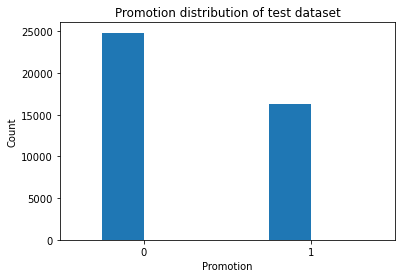

In [9]:
# Plotting the test promo distribution 

test_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of test dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/test_dataset_promo_distribution.jpg')
plt.show()

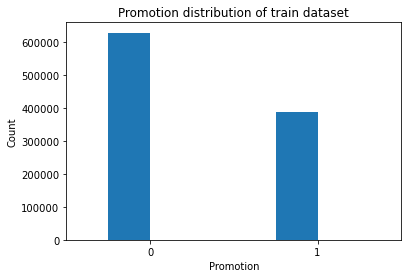

In [10]:
# Plotting the train promo distribution 

train_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of train dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/train_dataset_promo_distribution.jpg')
plt.show()

##### From the above graphs and percentage prints we can see that the promotion is distributed in both the train and test data similarly

In [11]:
# Finding out the state holiday field

train_data['StateHoliday'].value_counts().index.tolist()

['0', 0, 'a', 'b', 'c']

In [12]:
# Changing all the fields of the state holiday into string

train_data['StateHoliday'] = train_data['StateHoliday'].values.astype(str)
train_data['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

In [13]:
# Changing the state holiday fields to easy understandable names
 
train_data['StateHoliday'].replace({'0':'No Holiday','a':'Public Holiday','b':'Easter Holiday','c':'Christmas Holiday'},inplace=True)

In [14]:
# Ensuring if the train data column values has changed

train_data['StateHoliday'].value_counts().index.tolist()

['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']

In [15]:
# Separating the date column for further analysis

DC.convert_to_datetime(train_data, ['Date'])
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)
train_data['Month'] = train_data['Date'].apply(lambda x: x.month)
train_data['DayOfMonth'] = train_data['Date'].apply(lambda x: x.day)
train_data['Weekday'] = train_data['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1) # Identifying if the day is weekend or weekday

In [16]:
# Create a new analysed train_data

train_data.to_csv('../data/train_data_clean.csv',index=False)

### 2. Check & compare sales behavior before, during and after holidays

In [17]:
# Reading the data and making the index the date to make it easier for the time series analysis

train = pd.read_csv('../data/train_data_clean.csv',index_col='Date')
test = pd.read_csv('../data/train_data_clean.csv',index_col='Date')

In [18]:
# Finding out all the easter holidays

easter_holiday_list = train['StateHoliday'].where(train['StateHoliday']=='Easter Holiday')
easter_holiday_list = easter_holiday_list.dropna()
print(f'These are the easter holidays from 2013-2015:\n {easter_holiday_list.index.unique().tolist()}')


These are the easter holidays from 2013-2015:
 ['2015-04-06', '2015-04-03', '2014-04-21', '2014-04-18', '2013-04-01', '2013-03-29']


In [19]:
# Finding out all the public holidays

public_holiday_list = train['StateHoliday'].where(train['StateHoliday']=='Public Holiday')
public_holiday_list = public_holiday_list.dropna()
print(f'These are the public holidays from 2013-2015:\n {public_holiday_list.index.unique().tolist()}')


These are the public holidays from 2013-2015:
 ['2015-06-04', '2015-05-25', '2015-05-14', '2015-05-01', '2015-01-06', '2015-01-01', '2014-11-19', '2014-11-01', '2014-10-31', '2014-10-03', '2014-06-19', '2014-06-09', '2014-05-29', '2014-05-01', '2014-01-06', '2014-01-01', '2013-11-20', '2013-11-01', '2013-10-31', '2013-10-03', '2013-08-15', '2013-05-30', '2013-05-20', '2013-05-09', '2013-05-01', '2013-01-06', '2013-01-01']


In [20]:
# Finding out all the Christmas holidays

christmas_holiday_list = train['StateHoliday'].where(train['StateHoliday']=='Christmas Holiday')
christmas_holiday_list = christmas_holiday_list.dropna()
print(f'These are the Christmas holidays from 2013-2015:\n {christmas_holiday_list.index.unique().tolist()}')

These are the Christmas holidays from 2013-2015:
 ['2014-12-26', '2014-12-25', '2013-12-26', '2013-12-25']


In [21]:
# Sales Comparision on State Holiday

train_store_holiday = train.groupby('StateHoliday').agg({'Sales': 'mean'})
train_store_holiday['StateHoliday'] = train_store_holiday.index

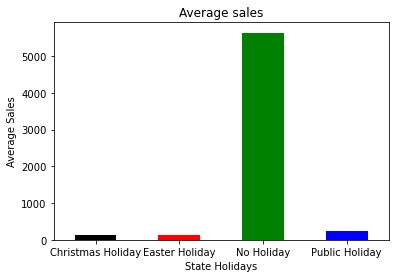

In [22]:
# Plotting the average sales per State holidays

train_store_holiday.plot(kind='bar',x='StateHoliday',y='Sales',rot='0',color=['black', 'red', 'green', 'blue'])
plt.title('Average sales')
plt.xlabel('State Holidays')
plt.ylabel('Average Sales')
plt.gca().get_legend().remove() # Removing the legend since we are working on univariate analysis
plt.savefig('../charts/average_sales_analysis.jpg')
plt.show()

In [23]:
# Creating a date column from the index 

train['date'] = train.index
train['date'] = pd.to_datetime(train['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Sales                      1017209 non-null  float64       
 3   Customers                  1017209 non-null  float64       
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   StoreType                  1017209 non-null  object        
 9   Assortment                 1017209 non-null  object        
 10  CompetitionDistance        1017209 non-null  float64       
 11  CompetitionOpenSinceMonth  101

In [24]:
# Creating the before after and during time stamp dataframe for 2014/15

before_index = (train["date"] >= pd.to_datetime("2014-11-25")) & (train["date"] < pd.to_datetime("2014-12-25")) # Taking the one month before xmass
before_xmass = train[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train["date"] >= pd.to_datetime("2014-12-25")) & (train["date"] < pd.to_datetime("2014-12-30")) # Thinking that the holiday will last for 6 days
during_xmass = train[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train["date"] >= pd.to_datetime("2015-01-01")) & (train["date"] < pd.to_datetime("2015-02-02"))# Taking the one month after xmass
after_xmass = train[after_index].groupby("date").agg({"Sales": "mean"})

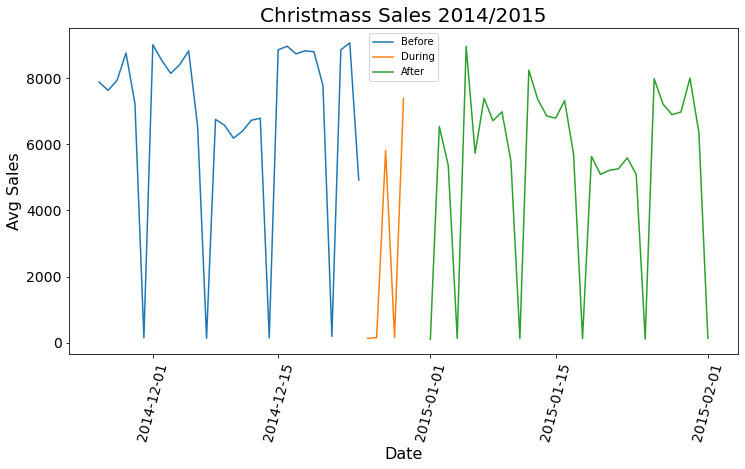

In [25]:
# Plotting the graph of xmass sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2014/2015", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../charts/christmass_sales_analysis_14-15.jpg')
plt.show()

In [26]:
# Creating the before after and during time stamp dataframe for 2013/14

before_index = (train["date"] >= pd.to_datetime("2013-11-25")) & (train["date"] < pd.to_datetime("2013-12-25")) # Taking the one month before xmass
before_xmass = train[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train["date"] >= pd.to_datetime("2013-12-25")) & (train["date"] < pd.to_datetime("2013-12-30")) # Thinking that the holiday will last for 6 days
during_xmass = train[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train["date"] >= pd.to_datetime("2014-01-01")) & (train["date"] < pd.to_datetime("2014-02-02"))# Taking the one month after xmass
after_xmass = train[after_index].groupby("date").agg({"Sales": "mean"})

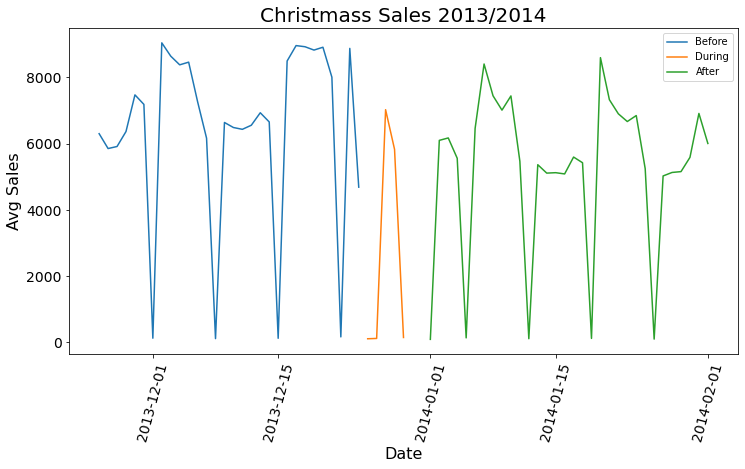

In [27]:
# Plotting the graph of xmass sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2013/2014", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../charts/christmass_sales_analysis_13-14.jpg')
plt.show()


#### From the above two plots we can see that the sales before christmass is greater than that of during and after

In [28]:
easter_holiday_list.index.unique().tolist()

['2015-04-06',
 '2015-04-03',
 '2014-04-21',
 '2014-04-18',
 '2013-04-01',
 '2013-03-29']

In [29]:
# Creating the before after and during time stamp dataframe for 2013/14

before_index = (train["date"] >= pd.to_datetime("2013-02-28")) & (train["date"] < pd.to_datetime("2013-03-29")) # Taking the one month before easter
before_easter = train[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train["date"] >= pd.to_datetime("2013-03-29")) & (train["date"] < pd.to_datetime("2013-04-01")) # Thinking that the holiday will last for 3 days
during_easter = train[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train["date"] >= pd.to_datetime("2013-04-02")) & (train["date"] < pd.to_datetime("2013-05-01"))# Taking the one month after easter
after_easter = train[after_index].groupby("date").agg({"Sales": "mean"})

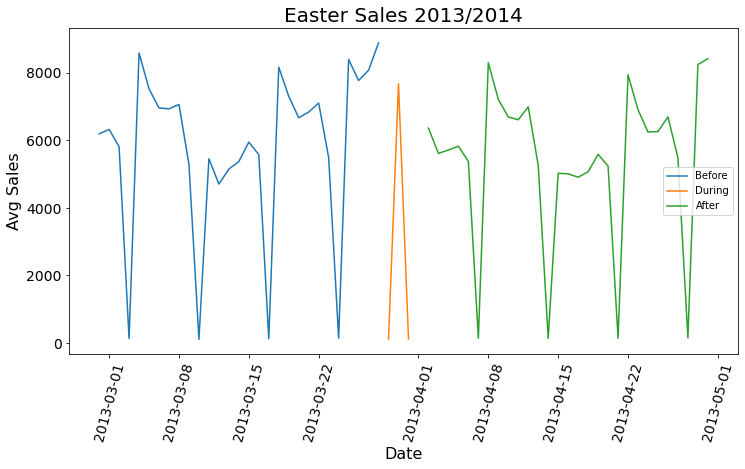

In [30]:
# Plotting the graph of Easter sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_easter.index, y = before_easter["Sales"], label='Before')
sns.lineplot(x = during_easter.index, y = during_easter["Sales"], label='During')
sns.lineplot(x = after_easter.index, y = after_easter["Sales"], label='After')

plt.title("Easter Sales 2013/2014", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../charts/easter_sales_analysis_13-14.jpg')
plt.show()

In [31]:
# Creating the before after and during time stamp dataframe for 2014/15

before_index = (train["date"] >= pd.to_datetime("2015-03-03")) & (train["date"] < pd.to_datetime("2015-04-03")) # Taking the one month before easter
before_easter = train[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train["date"] >= pd.to_datetime("2015-04-03")) & (train["date"] < pd.to_datetime("2015-04-06")) # Thinking that the holiday will last for 6 days
during_easter = train[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train["date"] >= pd.to_datetime("2015-04-06")) & (train["date"] < pd.to_datetime("2015-05-06"))# Taking the one month after easter
after_easter = train[after_index].groupby("date").agg({"Sales": "mean"})

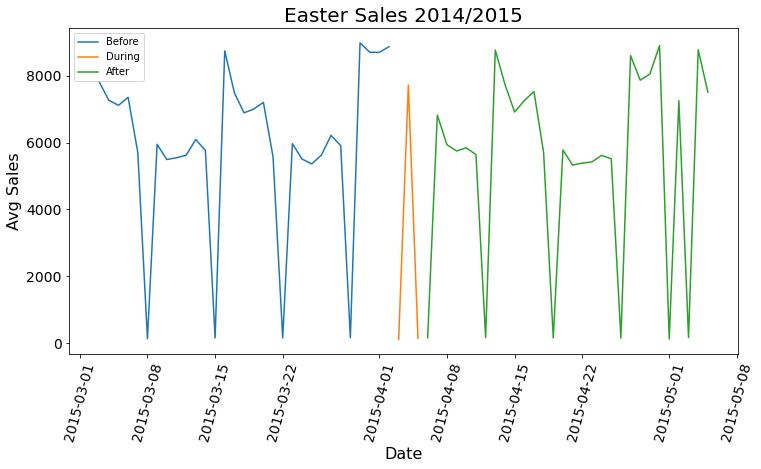

In [32]:
# Plotting the graph of Easter sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_easter.index, y = before_easter["Sales"], label='Before')
sns.lineplot(x = during_easter.index, y = during_easter["Sales"], label='During')
sns.lineplot(x = after_easter.index, y = after_easter["Sales"], label='After')

plt.title("Easter Sales 2014/2015", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../charts/easter_sales_analysis_14-15.jpg')
plt.show()

#### From the above plots we can see that the sales before easer and christmass are greater than that of during and after

In [33]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'DayOfMonth',
       'Weekday', 'date'],
      dtype='object')

### 3. What can you say about the correlation between sales and number of customers?


In [34]:
# Pointing out the fields for correlation check

fields_to_check_correlation = ['Sales','Customers']
sample_check_for_corr = train[fields_to_check_correlation]
sample_check_for_corr.head()

,Sales,Customers
Date,,
2015-07-31,5263.0,555.0
2015-07-31,6064.0,625.0
2015-07-31,8314.0,821.0
2015-07-31,13995.0,596.0
2015-07-31,4822.0,559.0


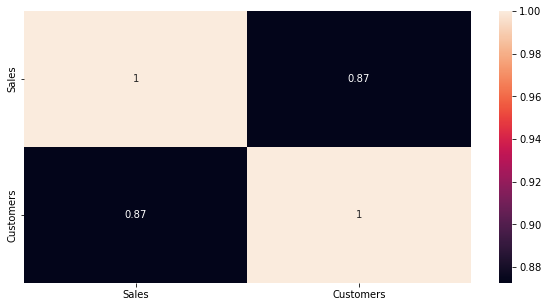

In [35]:
# Creating a correlation heatmap

corr = sample_check_for_corr.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot = True)
plt.savefig('../charts/correlation_heatmap.jpg')
plt.show()

#### From this we can deduce that customer number and sales are highly related

### 4. How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

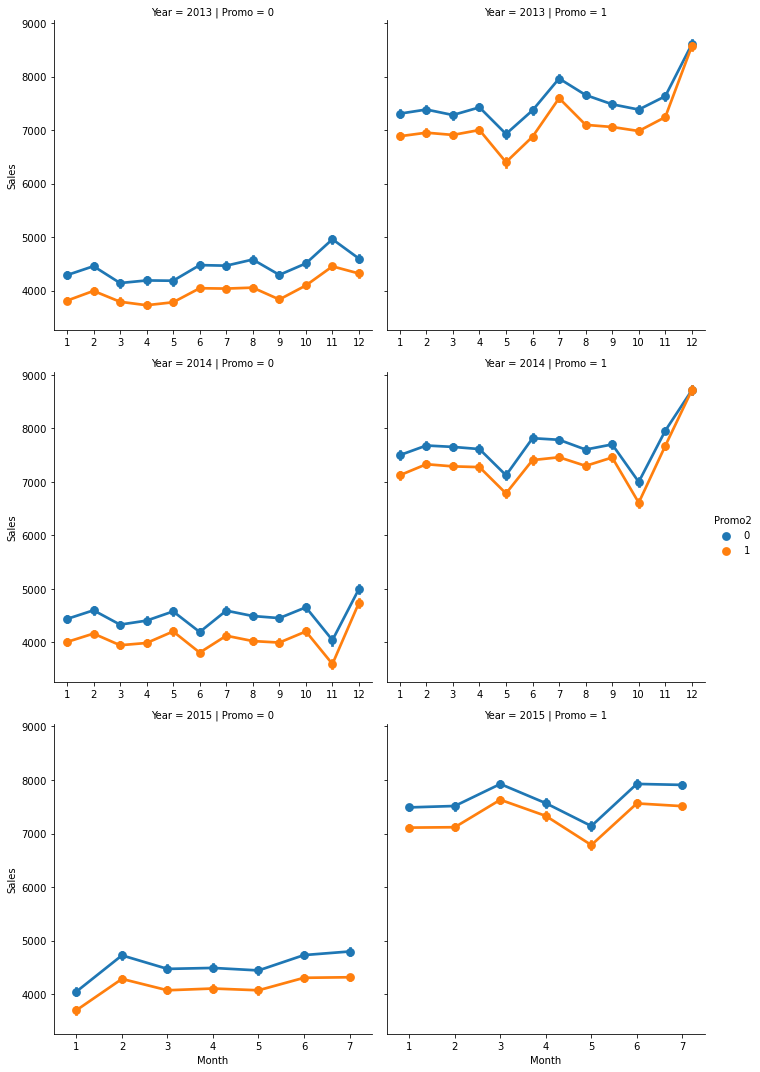

In [36]:
# Plotting the graph for all the years with promo available or not

sns.factorplot(data = train, x ="Month", y = 'Sales',col = 'Promo',  hue = 'Promo2', row = 'Year' ,sharex=False)
plt.savefig('../charts/sales_vs_promotion.jpg')

#### From the above plot we can see that the promotion is highly affecting the sales

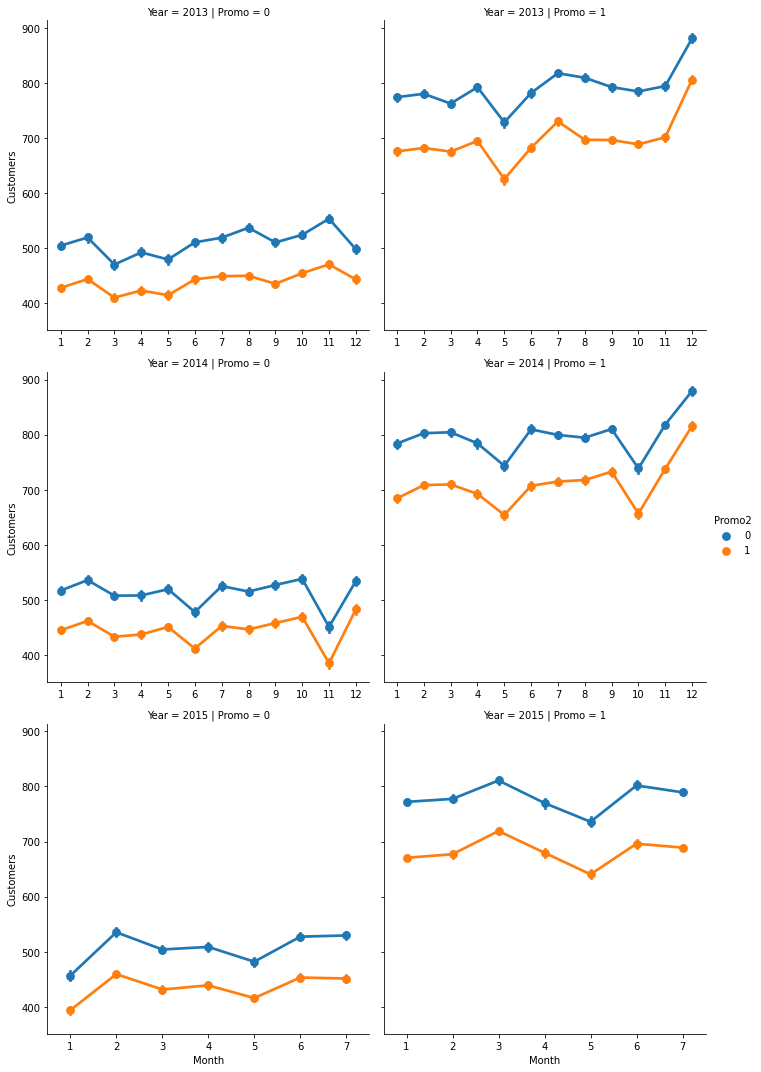

In [37]:
# Now lets see the promotion effect on customers

sns.factorplot(data = train, x ="Month", y = 'Customers',col = 'Promo',  hue = 'Promo2', row = 'Year' ,sharex=False)
plt.savefig('../charts/customers_vs_promotion.jpg') 

#### From the above plot we can see that the customers are affected by the promotion but not as much as the sales is. The magnitude is different

In [38]:
# Creating a new data frame for the existing customer analysis

df = train.copy()
df['Sales_per_customer'] = df['Sales']/df['Customers']

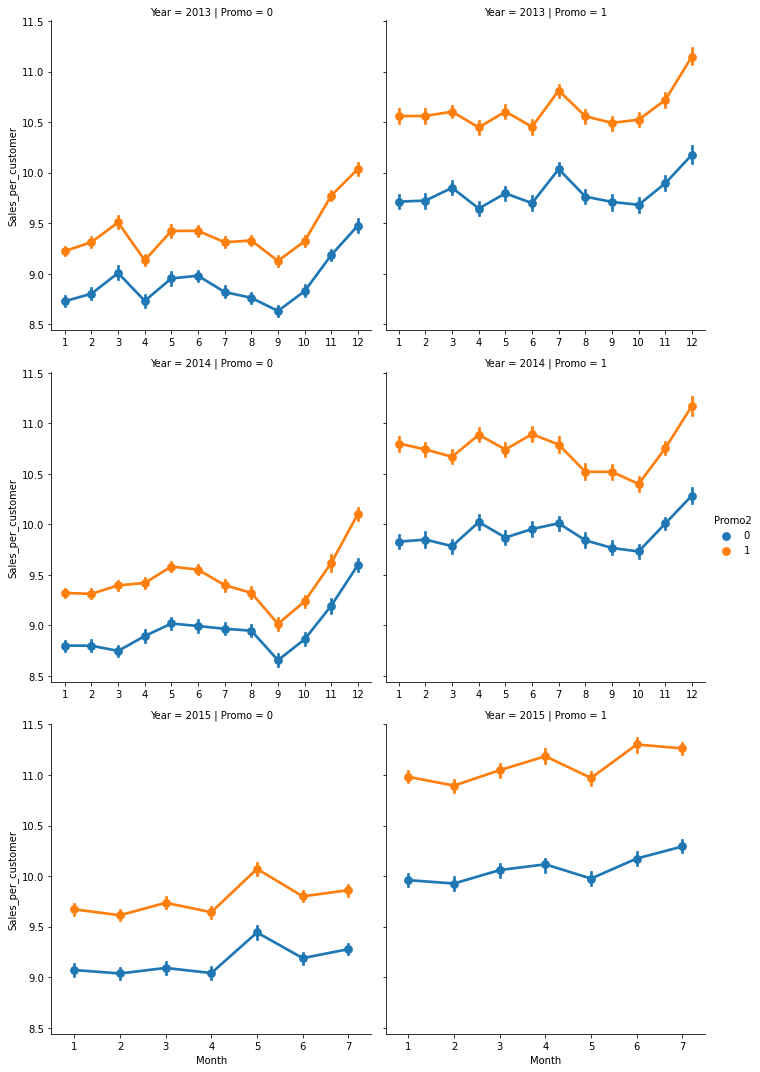

In [39]:
# Plotting the relationship between the already exsiting customer and promotion

sns.factorplot(data = df, x ='Month', y = 'Sales_per_customer', col = 'Promo', hue = 'Promo2',row = 'Year',sharex=False)
plt.savefig('../charts/existing_cutomer_vs_promotion.jpg')

#### From the graph we can conclude that the promotion has positively affected the already existing customers too. And also from the above graph it can be seen that promotion at the start of the years (Promo2) is not that much effective rather when we see the promo2 after the 6th month we can see a significant increase in the sales and customer. So from this we can suggest that the promotion done after the sixth month have greater impact than that of done in the first six months.

###  5. Trends of customer behavior during store open and closing times 
### 6. Which stores are opened on all weekdays? How does that affect their sales on weekends?


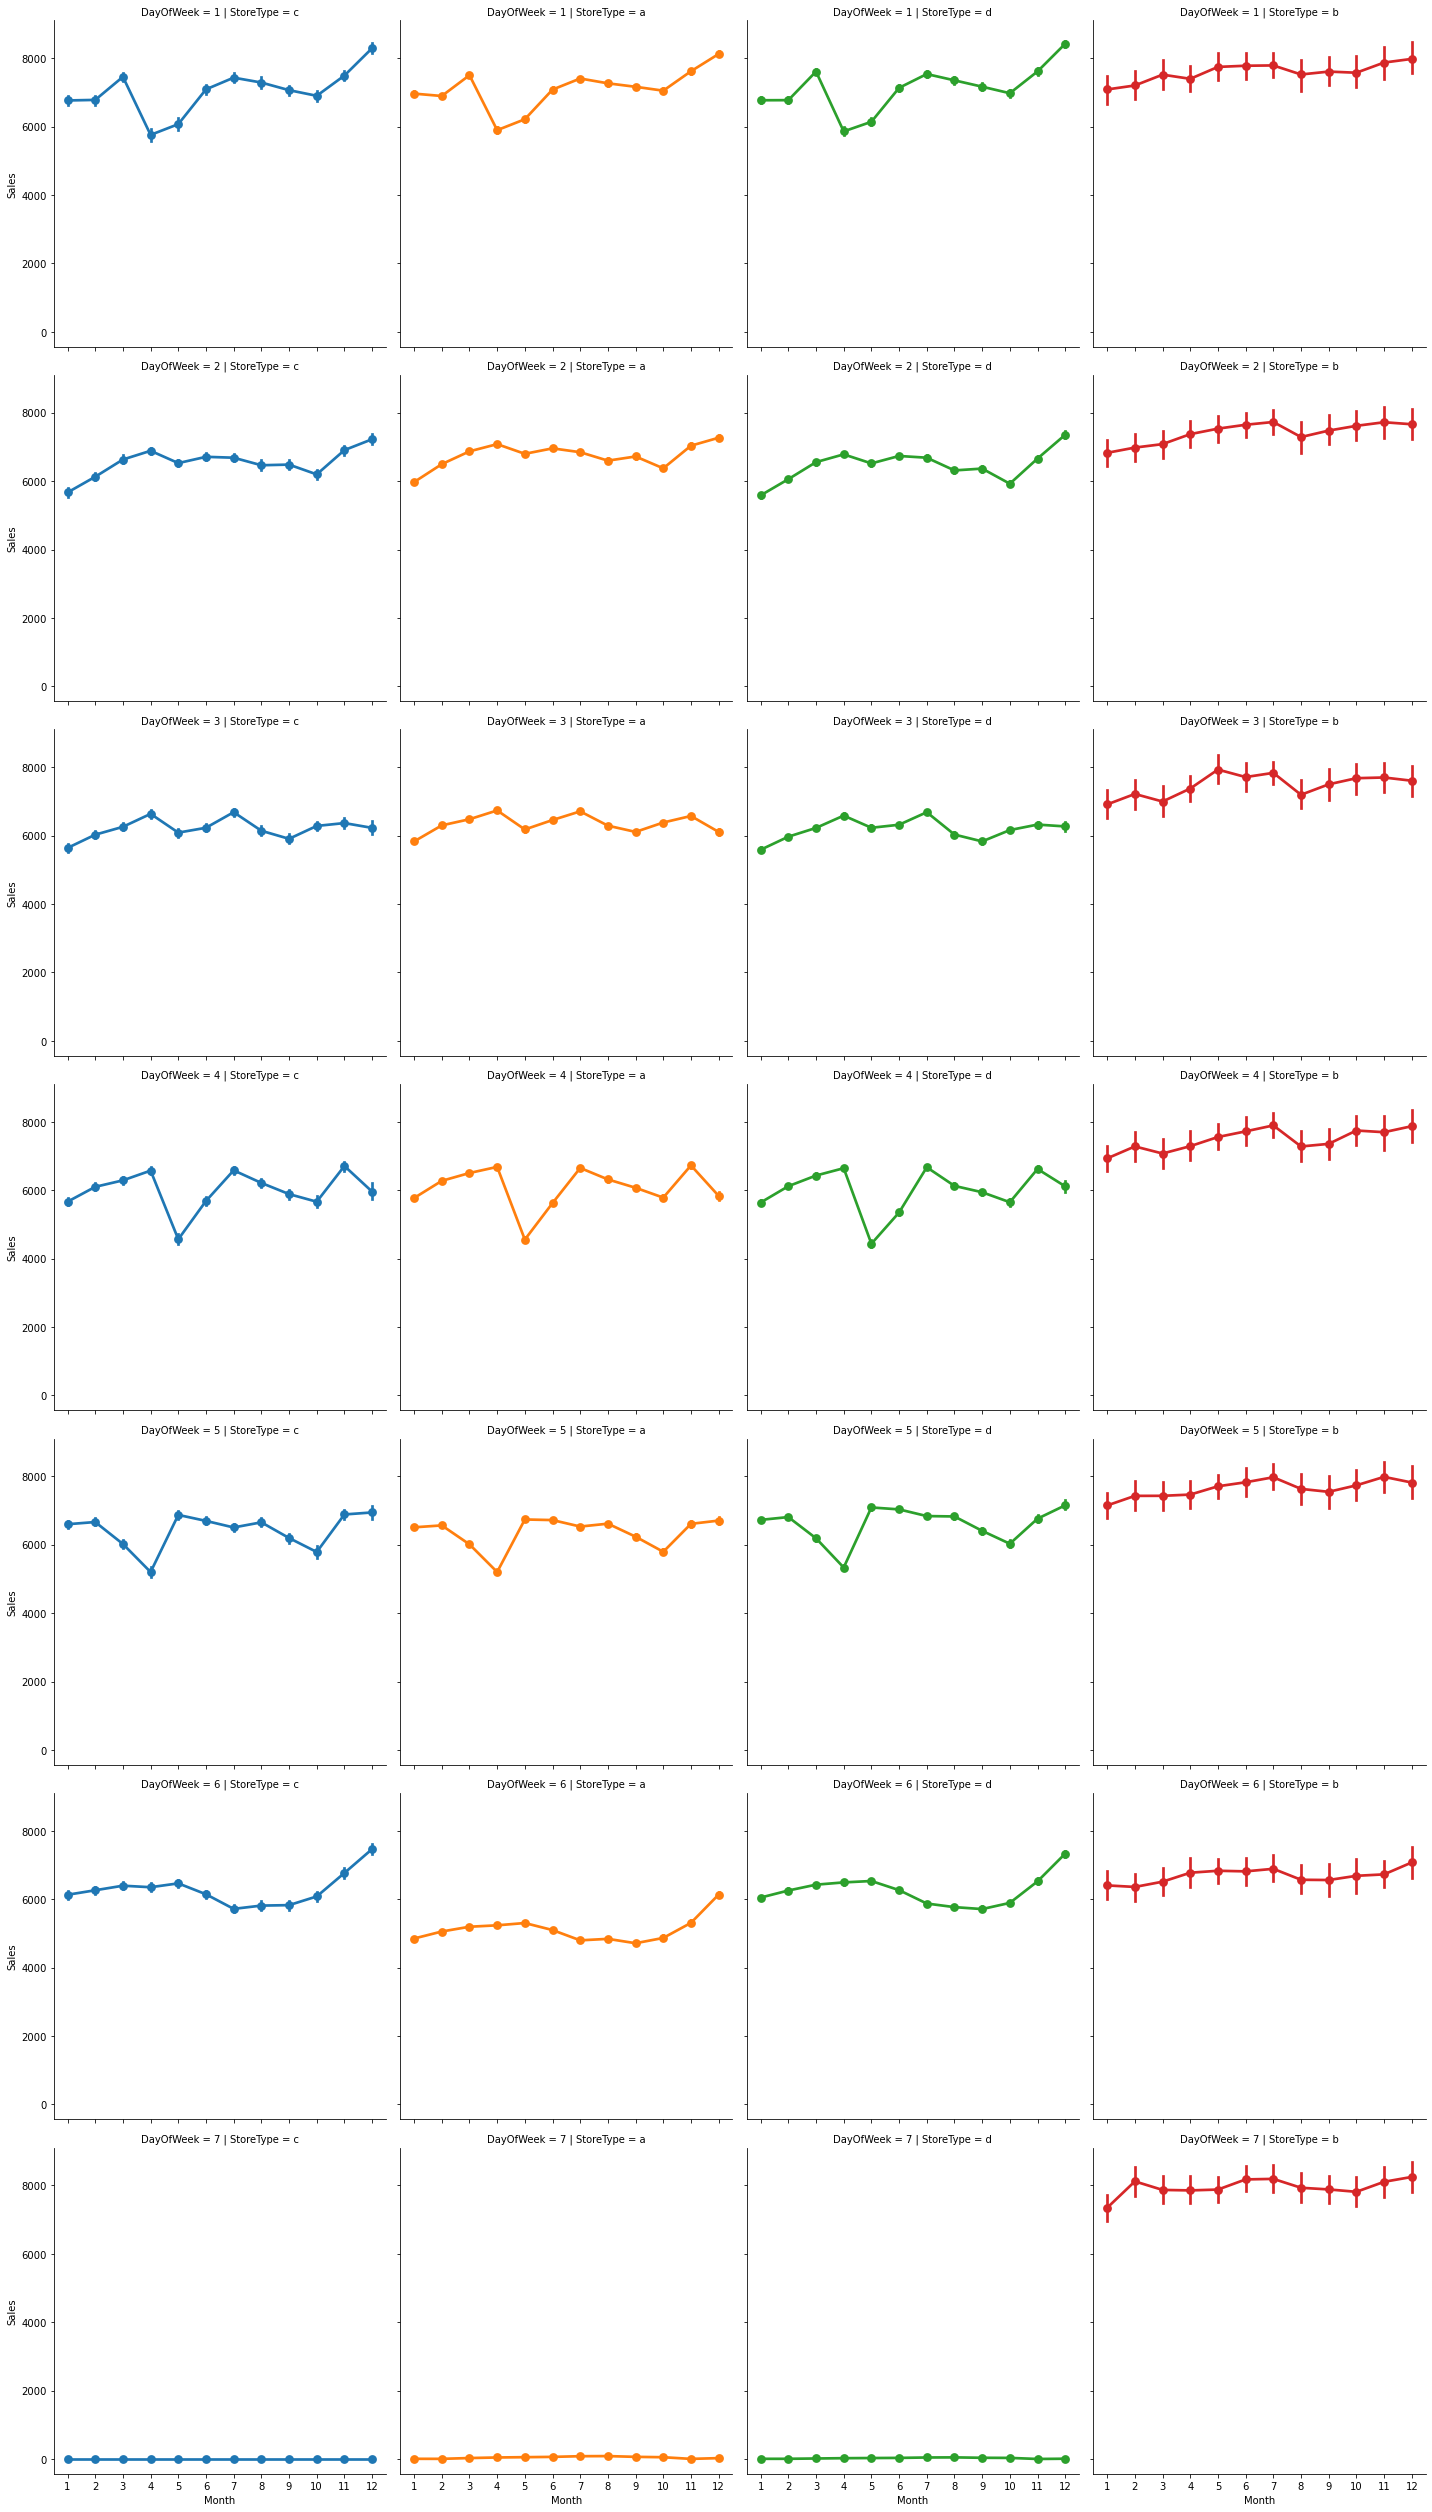

In [44]:
# Customer trends over the closing and opening dates plotting

sns.factorplot(data = train, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'DayOfWeek', # per day of week in the stores
               )
plt.savefig('../charts/customer_vs_week_viz.jpg')
plt.show()

#### From the above graph we can infer two things
#### 1. The first is that the sales is more or less constant in every week days but when we see on day 5 i.e. Friday there is a slight increase in sales
#### 2. The second thing I noticed from the plot is that all the stores are closed on weekend day 6 i.e. Sunday except store type b. And also the sales is constant all over the days on this store type

### 7. Check how the assortment type affects sales

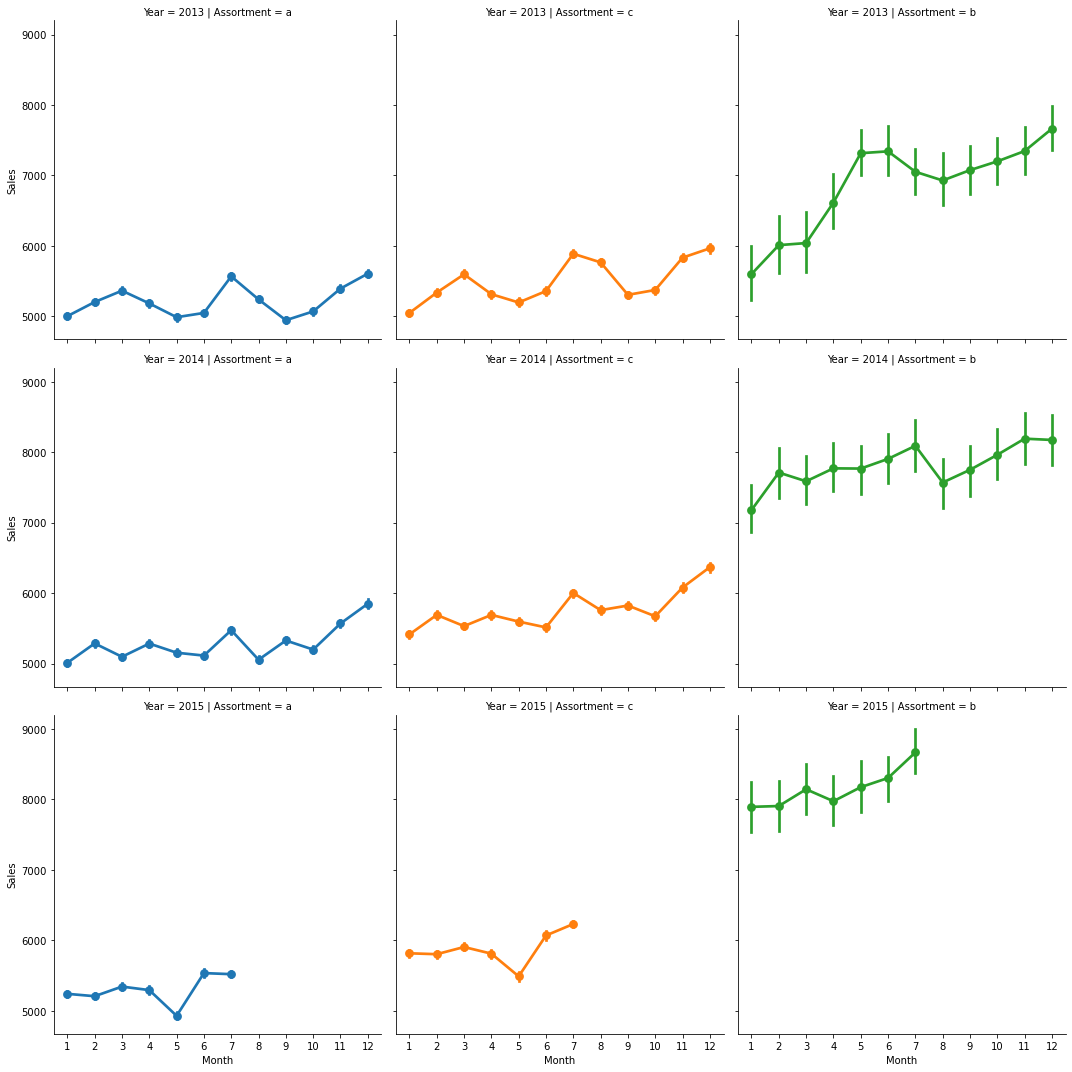

In [45]:
# Sales trends over the type of assortment plotting

sns.factorplot(data = train, x = 'Month', y = "Sales", 
               col = 'Assortment', # per assortment type in cols
               hue = 'Assortment',
               row = 'Year', # per year
               )
plt.savefig('../charts/sales_assortment_viz.jpg')
plt.show()

#### From the above graph we can see that the assortment type B has greater sales and also has greater magnitude of sales increament

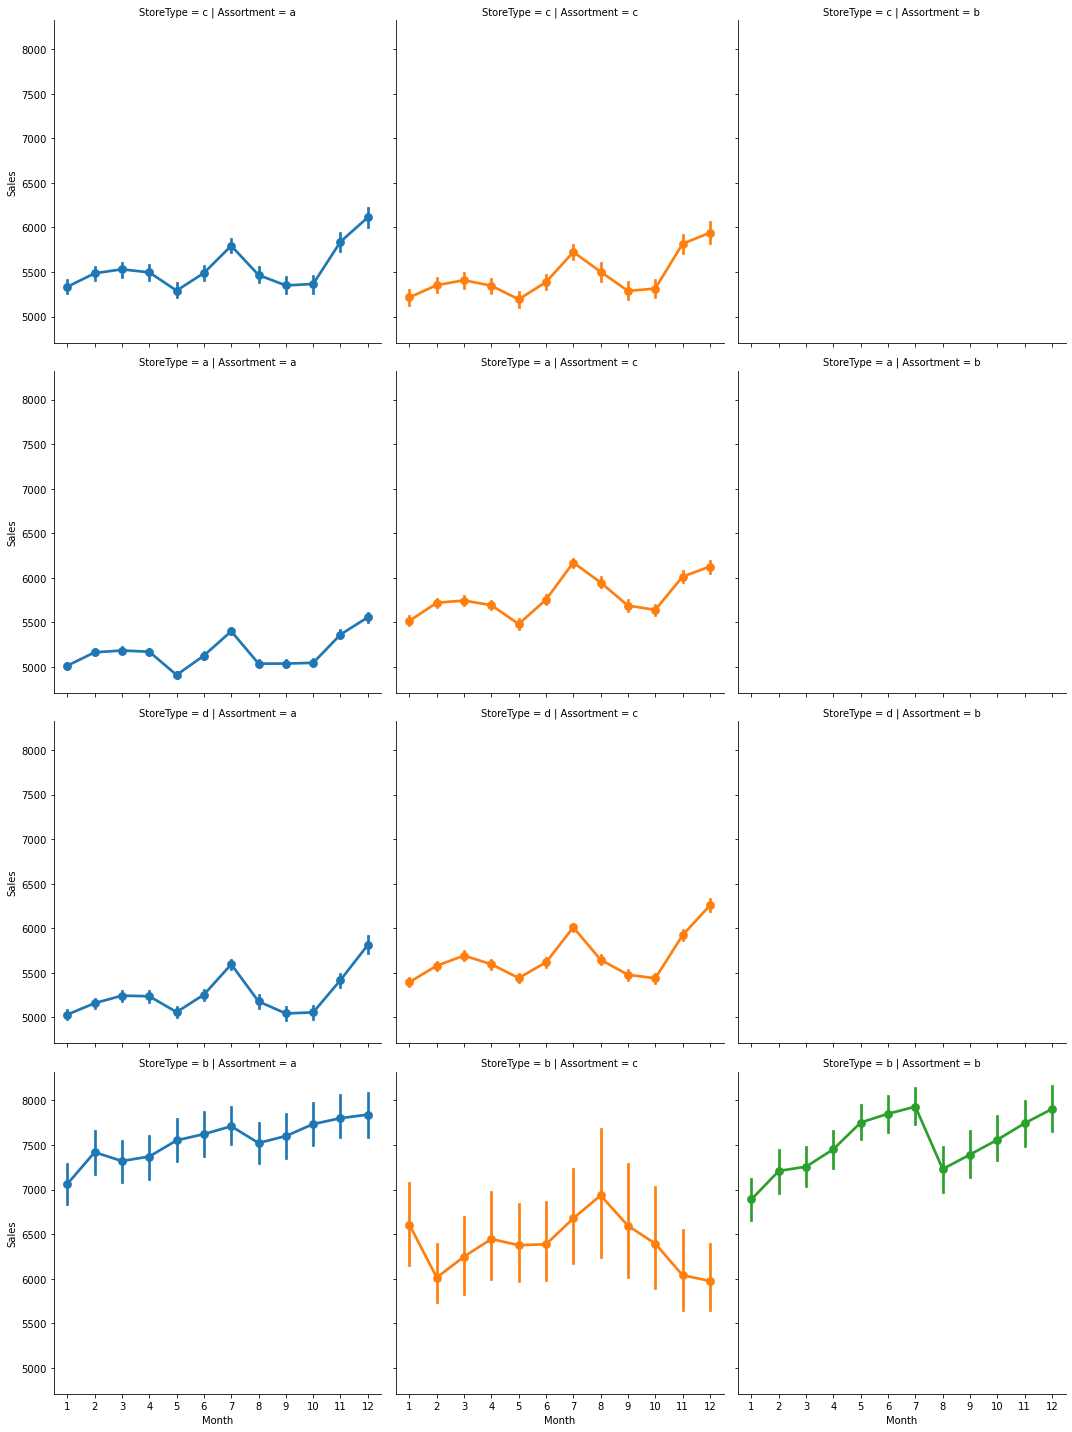

In [65]:
# Sales trends over the type of assortment plotting

sns.factorplot(data = train, x = 'Month', y = "Sales", 
               col = 'Assortment', # per assortment type in cols
               hue = 'Assortment',
               row = 'StoreType', # per year
               )
plt.savefig('../charts/sales_assortment_salestype_viz.jpg')
plt.show()

#### From the above plot we can infer that using the assortment type b for any store type is increasing the sales and the sales type B has greater sales

### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

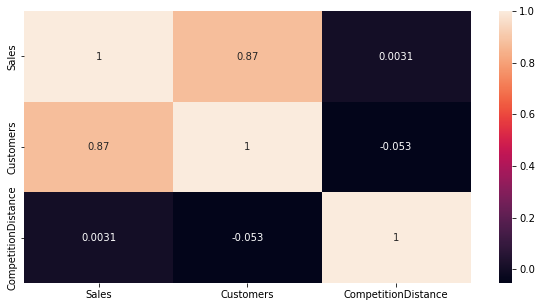

In [76]:
# Plotting correlation heatmap to see the competition distance effect on customer and sales

corr_columns = ['Sales','Customers','CompetitionDistance']
corr = train[corr_columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot = True)
plt.savefig('../charts/correlation_heatmap_comp_dist.jpg')
plt.show()

#### From the above plot we can see that the competition distance is affecting neither the customer nor the sales. Since the correlation is very small (less than 0.5)